In [1]:
import datetime
from calendar import monthrange
from datetime import timedelta

import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [2]:
def label_month(year, month, ax, i, j, cl="black"):
    months = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]

    month_label = f"{months[month-1]} {year}"
    ax.text(i, j, month_label, color=cl, va="center")

In [3]:
def label_weekday(ax, i, j, cl="black"):
    x_offset_rate = 1
    for weekday in ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]:
        ax.text(i, j, weekday, ha="center", va="center", color=cl)
        i += x_offset_rate

In [4]:
def label_day(ax, day, i, j, cl="black"):

    ax.text(i, j, int(day), ha="center", va="center", color=cl)

In [5]:
def fill_box(ax, i, j, cl="red"):
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, j - 0.5),
            1,
            1,
            edgecolor="blue",
            facecolor=cl,
            alpha=0.1,
            fill=True,
        )
    )

In [6]:
def check_fill_day(year, month, day, weekday, fillday_list):
    if (month, day) in fillday_list:
        return True

In [7]:
def check_color_day(year, month, day, weekday):
    if (month, day) in holiday_list:
        return "blue"

    if weekday == 6:  # Sunday
        return "red"
    
    if weekday == 5:  # Saturday
        return "red"

    return "black"

In [8]:
def month_calendar(ax, year, month, fill, fill_full, fill_half):
    date = datetime.datetime(year, month, 1)

    weekday, num_days = monthrange(year, month)

    # Adjust by 0.5 to set text at the center of the grid square
    x_start = 1 - 0.5
    y_start = 5 + 0.5
    x_offset_rate = 1
    y_offset = -1

    label_month(year, month, ax, x_start, y_start + 2)
    label_weekday(ax, x_start, y_start + 1)

    j = y_start

    for day in range(1, num_days + 1):
        i = x_start + weekday * x_offset_rate
        color = check_color_day(year, month, day, weekday)

        if fill and check_fill_day(year, month, day, weekday, fill_full):
            fill_box(ax, i, j, cl="red")

        if fill and check_fill_day(year, month, day, weekday, fill_half):
            fill_box(ax, i, j, cl="whitesmoke")

        label_day(ax, day, i, j, color)
        weekday = (weekday + 1) % 7
        if weekday == 0:
            j += y_offset

In [9]:
def anual_calender(year, fill, fill_full, fill_half):
    
    nrow = 3
    ncol = 4
    figsize=(10,6)
    fig, axs = plt.subplots(figsize=figsize, nrows=nrow, ncols=ncol)

    month = 1

    for ax in axs.reshape(-1):

        ax.axis([0, 7, 0, 7])
        ax.set_axis_off()
        month_calendar(ax, year, month, fill, fill_full, fill_half)

        month += 1

In [10]:
def main_calendar(year, month, fill_full, fill_half, grid=False, fill=False):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.axis([0, 7, 0, 7])
    ax.axis("off")

    if grid:
        ax.axis("on")
        ax.grid(grid)
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
    month_calendar(ax, year, month, fill, fill_full, fill_half)
    plt.show()

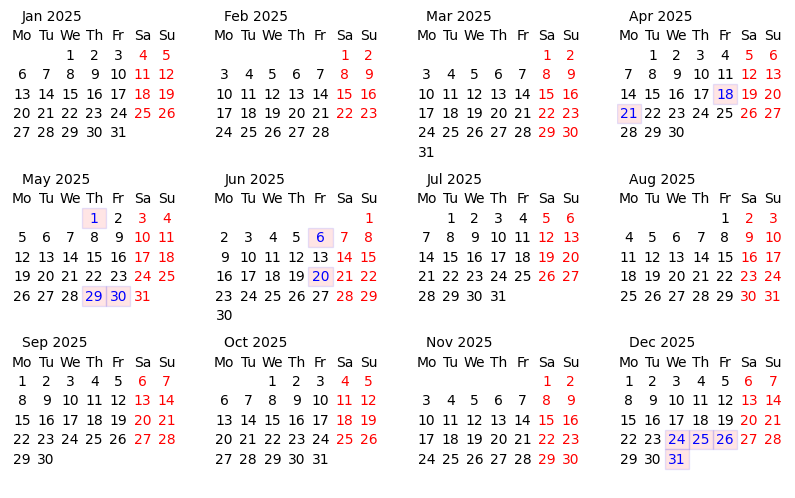

In [11]:
full_day_list = [(4, 18), (4, 21), (5, 1), (5, 29), (5, 30), (6, 6), (6, 20), (12, 24),(12, 25), (12, 26), (12, 31)]
half_day_list = []

# holiday
holiday_list = full_day_list + half_day_list

year = 2025

anual_calender(year, True, full_day_list, half_day_list)

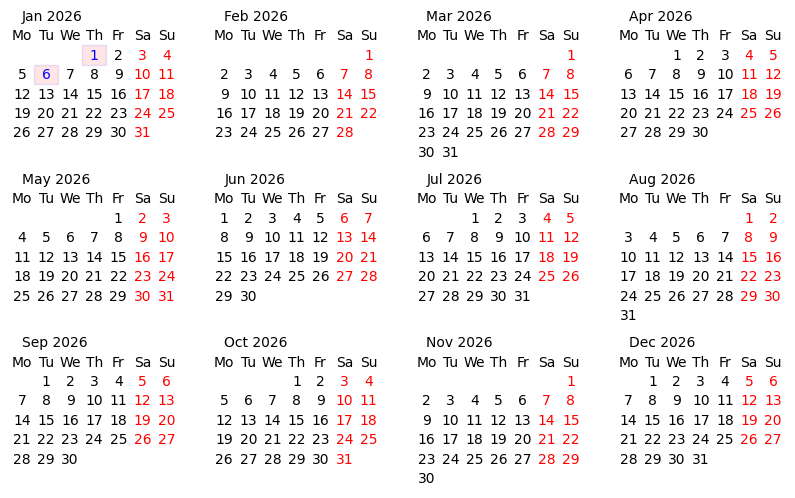

In [12]:
full_day_list = [(1, 1), (1, 6)]
half_day_list = []

# holiday
holiday_list = full_day_list + half_day_list

year = 2026

anual_calender(year, True, full_day_list, half_day_list)

In [13]:
#year=2022
#month=10
#main_calendar(year, month, grid=False, fill=False)
#main_calendar(year, month, grid=True, fill=True)